In [2]:
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt

In [3]:
ds_t = xr.open_dataset(
    "gs://aes-analytics-0002-curated-ibu/DataDrivenWeatherOutputs/processed/basic_inference/fcn/cds/fcn-cds-00020/t850.zarr", 
    engine="zarr"
    )
var_name = list(ds_t.keys())[0]
ds_t = ds_t.chunk(ds_t[var_name].encoding["preferred_chunks"])

ds_r = xr.open_dataset(
    "gs://aes-analytics-0002-curated-ibu/DataDrivenWeatherOutputs/processed/basic_inference/fcn/cds/fcn-cds-00020/r850.zarr", 
    engine="zarr"
    )
var_name = list(ds_r.keys())[0]
ds_r = ds_r.chunk(ds_r[var_name].encoding["preferred_chunks"])

# # Convertir temperatura de Kelvin a Celsius
# T_C = ds_t.t850 - 273.15

# # Calcular la presión de vapor saturado (e_sat) en hPa usando la fórmula de Magnus
# A = 6.1094
# B = 17.625
# C = 243.04
# e_sat = A * np.exp((B * T_C) / (C + T_C))

# # Calcular la presión de vapor real (e) en hPa
# RH = ds_r.r850 / 100  # Convertir la humedad relativa de porcentaje a fracción
# e = RH * e_sat

ds_t

<xarray.Dataset>
Dimensions:   (lat: 720, leadtime: 21, lon: 1440, time: 730)
Coordinates:
  * lat       (lat) float64 90.0 89.75 89.5 89.25 ... -89.0 -89.25 -89.5 -89.75
  * leadtime  (leadtime) int64 0 1 2 3 4 5 6 7 8 ... 12 13 14 15 16 17 18 19 20
  * lon       (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * time      (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2022-12-31
Data variables:
    t850      (time, leadtime, lat, lon) float32 dask.array<chunksize=(90, 21, 120, 120), meta=np.ndarray>

In [4]:
# Convertir temperatura de Kelvin a Celsius
T_C = ds_t.t850 - 273.15

# Calcular la presión de vapor saturado (e_sat) en hPa usando la fórmula de Magnus
A = 6.1094
B = 17.625
C = 243.04
e_sat = A * np.exp((B * T_C) / (C + T_C))

# Calcular la presión de vapor real (e) en hPa
RH = ds_r.r850 / 100  # Convertir la humedad relativa de porcentaje a fracción
e = RH * e_sat

e

<xarray.DataArray (time: 730, leadtime: 21, lat: 720, lon: 1440)>
dask.array<mul, shape=(730, 21, 720, 1440), dtype=float32, chunksize=(90, 21, 120, 120), chunktype=numpy.ndarray>
Coordinates:
  * lat       (lat) float64 90.0 89.75 89.5 89.25 ... -89.0 -89.25 -89.5 -89.75
  * leadtime  (leadtime) int64 0 1 2 3 4 5 6 7 8 ... 12 13 14 15 16 17 18 19 20
  * lon       (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * time      (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2022-12-31

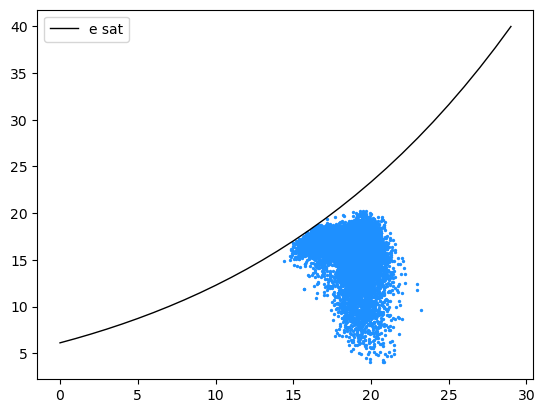

In [11]:
t_range = 30
plt.plot(
    np.arange(t_range),
    A * np.exp((B * np.arange(t_range)) / (C + np.arange(t_range))),
    color="black",
    lw=1,
    label="e sat"
    )

leadtime = 0
plt.scatter(
    T_C.sel(lon=-75.5635900, lat=6.2518400, method="nearest").values.ravel(),
    e.sel(lon=-75.5635900, lat=6.2518400, method="nearest").values.ravel(),
    s=2,
    c="dodgerblue",
    )

plt.legend()
plt.show()
plt.close("all")


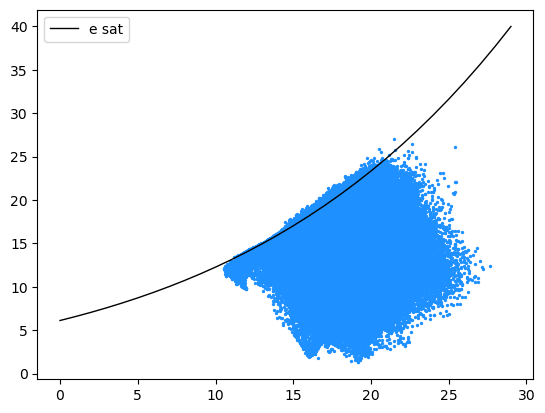

In [5]:
t_range = 30
plt.plot(
    np.arange(t_range),
    A * np.exp((B * np.arange(t_range)) / (C + np.arange(t_range))),
    color="black",
    lw=1,
    label="e sat"
    )

leadtime = 0
plt.scatter(
    T_C.sel(lon=slice((-82 + 360)%360, (-66 + 360)%360), lat=slice(12.5, -4), leadtime=0).values.ravel(),
    e.sel(lon=slice((-82 + 360)%360, (-66 + 360)%360), lat=slice(12.5, -4), leadtime=0).values.ravel(),
    s=2,
    c="dodgerblue",
    )

plt.legend()
plt.show()
plt.close("all")

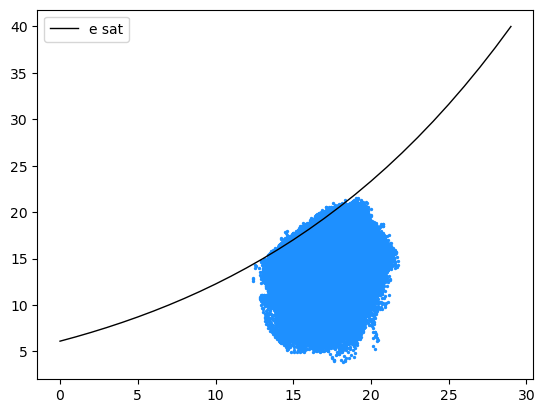

In [9]:
t_range = 30
plt.plot(
    np.arange(t_range),
    A * np.exp((B * np.arange(t_range)) / (C + np.arange(t_range))),
    color="black",
    lw=1,
    label="e sat"
    )

leadtime = 0
plt.scatter(
    T_C.sel(lon=slice((-82 + 360)%360, (-66 + 360)%360), lat=slice(12.5, -4), leadtime=10).values.ravel(),
    e.sel(lon=slice((-82 + 360)%360, (-66 + 360)%360), lat=slice(12.5, -4), leadtime=10).values.ravel(),
    s=2,
    c="dodgerblue",
    )

plt.legend()
plt.show()
plt.close("all")

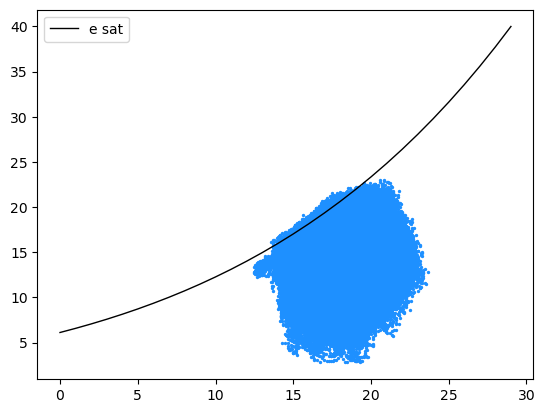

In [10]:
t_range = 30
plt.plot(
    np.arange(t_range),
    A * np.exp((B * np.arange(t_range)) / (C + np.arange(t_range))),
    color="black",
    lw=1,
    label="e sat"
    )

leadtime = 0
plt.scatter(
    T_C.sel(lon=slice((-82 + 360)%360, (-66 + 360)%360), lat=slice(12.5, -4), leadtime=20).values.ravel(),
    e.sel(lon=slice((-82 + 360)%360, (-66 + 360)%360), lat=slice(12.5, -4), leadtime=20).values.ravel(),
    s=2,
    c="dodgerblue",
    )

plt.legend()
plt.show()
plt.close("all")

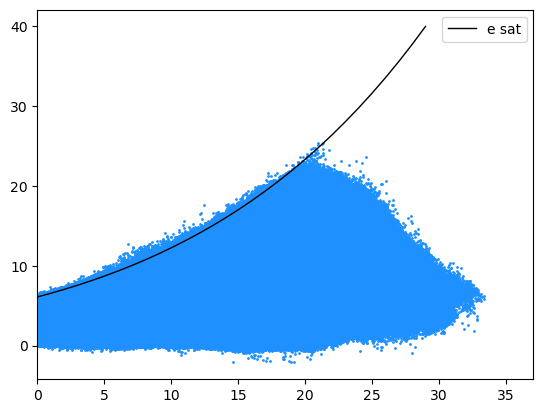

In [14]:
t_range = 30
plt.plot(
    np.arange(t_range),
    A * np.exp((B * np.arange(t_range)) / (C + np.arange(t_range))),
    color="black",
    lw=1,
    label="e sat",
    zorder=30,
    )

leadtime = 0
plt.scatter(
    T_C.sel(time="2021-03-10", method="nearest").values.ravel(),
    e.sel(time="2021-03-10", method="nearest").values.ravel(),
    s=1,
    c="dodgerblue",
    )

plt.xlim(0, None)

plt.legend()
plt.show()
plt.close("all")

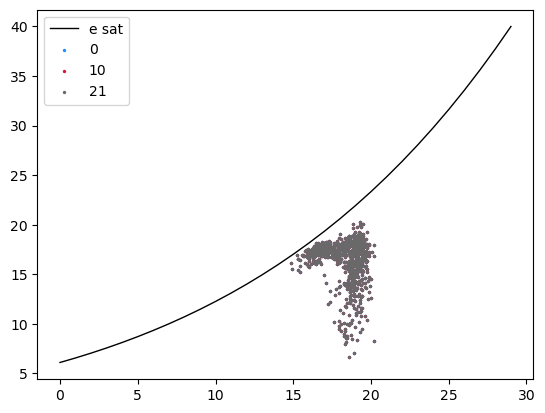

In [10]:
t_range = 30
plt.plot(
    np.arange(t_range),
    A * np.exp((B * np.arange(t_range)) / (C + np.arange(t_range))),
    color="black",
    lw=1,
    label="e sat"
    )

leadtime = 0
plt.scatter(
    T_C.sel(lon=-75.5635900, lat=6.2518400, leadtime=10, method="nearest").values,
    e.sel(lon=-75.5635900, lat=6.2518400, leadtime=10, method="nearest").values,
    s=2,
    c="dodgerblue",
    label=leadtime
    )

leadtime = 10
plt.scatter(
    T_C.sel(lon=-75.5635900, lat=6.2518400, leadtime=10, method="nearest").values,
    e.sel(lon=-75.5635900, lat=6.2518400, leadtime=10, method="nearest").values,
    s=2,
    c="crimson",
    label=leadtime
    )

leadtime = 21
plt.scatter(
    T_C.sel(lon=-75.5635900, lat=6.2518400, leadtime=10, method="nearest").values,
    e.sel(lon=-75.5635900, lat=6.2518400, leadtime=10, method="nearest").values,
    s=2,
    c="dimgrey",
    label=leadtime
    )

plt.legend()
plt.show()
plt.close("all")

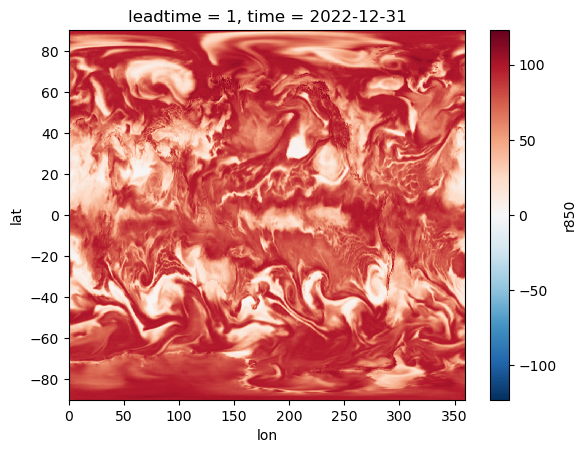

In [5]:
ds_r.r850.isel(time=-1, leadtime=1,).plot()

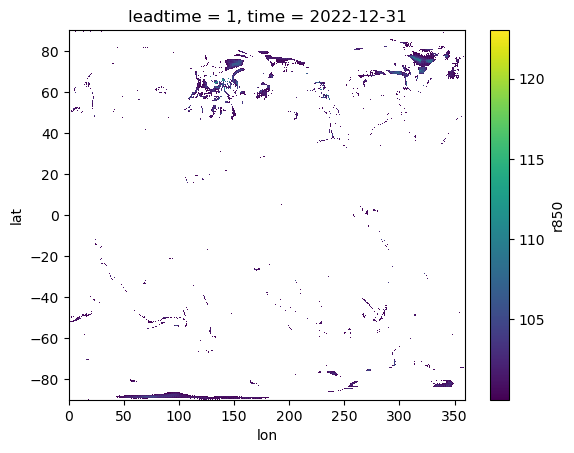

In [7]:
ds_r.r850.isel(time=-1, leadtime=1,).where(ds_r.r850.isel(time=-1, leadtime=1,) > 100).plot()